In [2]:
word = 'kangeunda happy'
d=dict()
for c in word:
    if c not in d:
        d[c] = 1
    else : 
        d[c] = d[c] + 1
print d
print len(d)
print d.keys()
print d.values()

{'a': 3, ' ': 1, 'e': 1, 'd': 1, 'g': 1, 'h': 1, 'k': 1, 'n': 2, 'p': 2, 'u': 1, 'y': 1}
11
['a', ' ', 'e', 'd', 'g', 'h', 'k', 'n', 'p', 'u', 'y']
[3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1]


In [3]:
echo "Hello kangeunda \n this is a line \n hello" > temp.txt

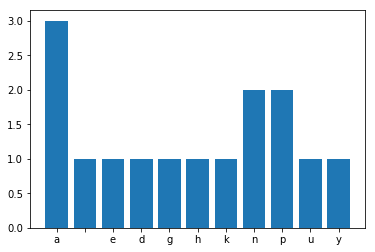

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.bar(range(len(d)), d.values(), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.show()

In [20]:
import webbrowser

myurl='https://www.google.co.kr/maps/place/Hongji-dong,+Jongno-gu,+Seoul/'
webbrowser.open(myurl)

True

In [21]:
import urllib
params = urllib.urlencode({"#q":"python tutorial"})
print params

%23q=python+tutorial


In [22]:
url = 'http://www.google.com/#q='
print url + urllib.quote_plus('python tutorial')

http://www.google.com/#q=python+tutorial


In [24]:
import urllib2
url = 'http://www.python.org'
request = urllib2.Request(url)
response = urllib2.urlopen(request)
html = response.read()
print html[:500]

<!doctype html>
<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->
<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->
<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->

<head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jqu


In [30]:
%%writefile src/midtermBeautifulSoup.py
import urllib
from bs4 import BeautifulSoup
uResponse=urllib.urlopen('http://python.org/')
_html = uResponse.read()
tree = BeautifulSoup(_html,"lxml")
strongtags=tree('strong')
for tag in strongtags:
    print tag

Overwriting src/midtermBeautifulSoup.py


In [32]:
%%HTML
<html>
<body>
<h2 class="my">Turn this into blue</h2>
<button onclick="myFunction()">Click</button>
<script>
function myFunction(){
    document.querySelector(".my").style.backgroundColor = "blue";
}
</script>
</body>
</html>

In [40]:
from bs4 import BeautifulSoup
import re
htmlstr = """
<p>this is number 12345</p>
<p>this is text</p>
"""

soup = BeautifulSoup(htmlstr)
for e in soup(text=re.compile(r'\d+')):
    print "tag : ", e.parent
    print "text: ",e

tag :  <p>this is number 12345</p>
text:  this is number 12345


In [41]:
f=open(os.path.join('src','mypage1.html'))
htmlstr = f.read()
f.close()

In [45]:
import lxml.etree

tree = lxml.etree.fromstring(htmlstr)
for node in tree.getiterator():
    print"태그 : ", node.tag, node.attrib

태그 :  html {}
태그 :  head {}
태그 :  title {}
태그 :  body {}
태그 :  h1 {}
태그 :  p {}
태그 :  p {}


In [64]:
%%writefile midtermT/webCraling1_regex.py
import re
import requests
rResponse=requests.get('http://python.org/')
_html = rResponse.text
p = re.compile('href="(http://.*?)"')
nodes = p.findall(_html)
print "How many http url?",len(nodes)
for i, node in enumerate(nodes):
    print i,node

Writing midtermT/webCraling1_regex.py


In [63]:
%%writefile midtermT/webCraling1_xpath.py
import re
import requests
rResponse=requests.get('http://python.org/')
_html = rResponse.text
from lxml import etree
_htmlTree = etree.HTML(_html)
result = etree.tostring(_htmlTree, pretty_print=True, method="html")
print len(result)
nodes = _htmlTree.xpath('//*[@href]')
print len(nodes)
for i,node in enumerate(nodes):
    if i < 20:
        print i, node.attrib

Writing midtermT/webCraling1_xpath.py


In [69]:
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('http://python.org/')
_html=r.text
html = lxml.html.fromstring(r.text)
sel=CSSSelector('a[href]')
nodes = set(html)
print len(nodes)
for i, node in enumerate(nodes):
    if i<20:
        print i, node.get('href'), node.text

3
0 None 
    
1 None 

    
2 None <![endif]


In [75]:
%%writefile midtermT/webCraling4_cssSelect.py
# coding: utf-8
import lxml.html
import requests
from lxml.cssselect import CSSSelector

keyword='바보 같은'
r = requests.get("http://music.naver.com/search/search.nhn?query="+keyword+"&x=0&y=0")
_html = lxml.html.fromstring(r.text)

sel = CSSSelector('table[summary] > tbody > ._tracklist_move')
# Apply the selector to the DOM tree.
nodes = sel(_html)

_selName = CSSSelector('.name > a.title')
_selArtist = CSSSelector('._artist.artist')
_selAlbum= CSSSelector('.album > a')
for node in nodes:
    #print lxml.html.tostring(item)
    _name=_selName(node)
    _artist=_selArtist(node)
    _album=_selAlbum(node)
    if _name:
        print "artist: ", _artist[0].text_content().strip(),
        print "---",
        print "song : ",_name[0].text_content(),
        print "---",
        print "album : ",_album[0].text_content()

Writing midtermT/webCraling4_cssSelect.py


In [74]:
%%writefile midtermT/webCraling5.py
# coding: utf-8
import lxml.html
from lxml.cssselect import CSSSelector
import requests
r = requests.get('http://www.ieee.org/conferences_events/conferences/search/index.html')

html = lxml.html.fromstring(r.text)
sel=CSSSelector('div.content-r-full table.nogrid-nopad tr p>a[href]')
nodes = sel(html)
for node in nodes:
    print node.text
    print "----------"

Writing midtermT/webCraling5.py


In [79]:
%%writefile midtermT/save_5.js
use myMidDB
show dbs
show tables
db.myCol.insert({"Persons":[{"id":"405", "name":"kangEunda"},{"id":"406", "name":"KimJiyoung"}]})
db.myCol.find({"Persons.name":"KangEunda"})

Overwriting midtermT/save_5.js


In [80]:
%%writefile midtermT/key.properties
dataseoul=5a61567861646d73343375764d626f
gokr=brOVF7Bb7pkN%2BUg640BlylpMnEcjZMPdbHKUJdFEnZERF7bkrgWNheP1sn6JH2gzbuT4uFsz06KU2ym7Y8TfZA%3D%3D

Writing midtermT/key.properties


In [88]:
%%writefile midtermT/mylib2.py
import os
def sayHello():
    print "hello"
def sayHello2():
    print "hello 2"
def getKey(keyPath):
    d=dict()
    keyPath=os.path.join('src','key.properties')
    f=open(keyPath,'r')
    for line in f.readlines():
        row=line.split('=')
        row0=row[0]
        d[row[0]]=row[1].strip()
    return d

Overwriting midtermT/mylib2.py


In [82]:
%%writefile midtermT/__init__.py
import os

Writing midtermT/__init__.py


In [85]:
!ls midtermT/

__init__.py
key.properties
mylib2.py
save_5.js
webCraling1_regex.py
webCraling1_xpath.py
webCraling4_cssSelect.py
webCraling5.py


In [95]:
import midtermT.mylib2
midtermT.mylib2.sayHello()
midtermT.mylib2.sayHello2()

hello
hello 2


In [90]:
import os
d=dict()
keyPath=os.path.join('midtermT','key.properties')
f=open(keyPath,'r')
print f.readlines()

['dataseoul=5a61567861646d73343375764d626f\n', 'gokr=brOVF7Bb7pkN%2BUg640BlylpMnEcjZMPdbHKUJdFEnZERF7bkrgWNheP1sn6JH2gzbuT4uFsz06KU2ym7Y8TfZA%3D%3D']
